**Распознавание изображений из набора данных MNIST, CIFAR-10 и базы автомобилей с помощью сверточных нейросетей**

In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел
import math # Для округления
import os #Для работы с файлами
import pandas as pd
# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Распознование изображений MNIST**

✔ Лёгкий уровень сложности

In [ ]:
# загрузка базы mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

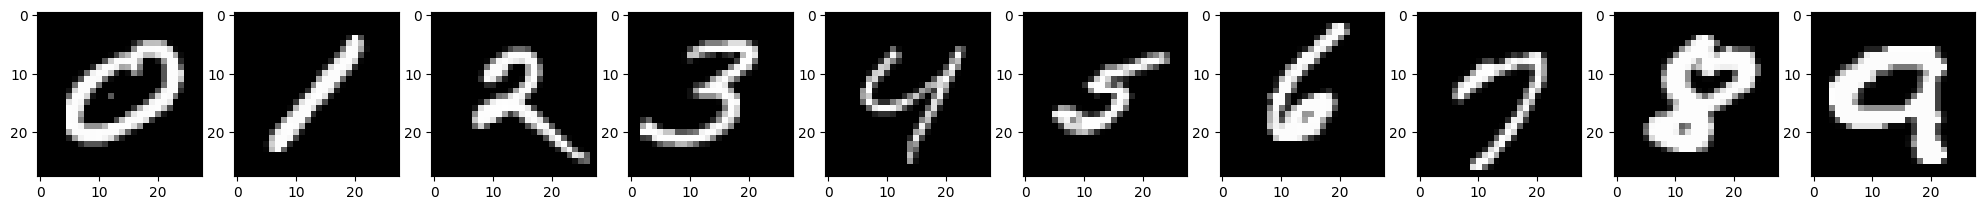

In [ ]:
# вывод картинок

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) # создание пространства для 10 графиков
for i in range(10):
  label_indexes = np.where(y_train==i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # случайным образом выбираем из списка индекс
  img = x_train[index] # выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # отображение изображения

plt.show() # выводим изображения

In [ ]:
# превращение тренировочной и тестовой выборок в формат one-hot-encoding

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
# 1 к размерности для определения чб цвета
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# форматы выборок
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**Функция записи результатов в таблицу**

In [ ]:
# создание таблицы для записи результатов
df = pd.DataFrame(columns=['model', 'neurons_num', 'activation', 'batch_size', 'accuracy'])

In [ ]:
df

,model,neurons_num,activation,batch_size,accuracy


**Нейронная сеть**

In [ ]:
batch_size = 100

# создаем последовательную модель
model = Sequential()
# первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='linear', input_shape=(28, 28, 1)))
# второй сверточный слой
model.add(Conv2D(16, (3, 3), padding='same', activation='linear'))
# первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# слой регуляризации Dropout
model.add(Dropout(0.25))

model.add(Flatten())
# полносвязный слой для классификации
model.add(Dense(256, activation='linear'))
# слой регуляризации Dropout
model.add(Dropout(0.25))
# выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

# компиляция
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_36 (Conv2D)          (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_34 (Dropout)        (None, 14, 14, 16)        0         
                                                                 
 flatten_17 (Flatten)        (None, 3136)              0         
                                                                 
 dense_34 (Dense)            (None, 256)               803072    
                                                     

Epoch 1/10
600/600 [==============================] - 5s 6ms/step - loss: 2.6443 - accuracy: 0.8842 - val_loss: 0.5130 - val_accuracy: 0.9520
Epoch 2/10
600/600 [==============================] - 4s 6ms/step - loss: 0.6294 - accuracy: 0.9297 - val_loss: 0.3047 - val_accuracy: 0.9533
Epoch 3/10
600/600 [==============================] - 6s 10ms/step - loss: 0.3571 - accuracy: 0.9411 - val_loss: 0.2043 - val_accuracy: 0.9606
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2284 - accuracy: 0.9504 - val_loss: 0.1751 - val_accuracy: 0.9594
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1800 - accuracy: 0.9550 - val_loss: 0.1440 - val_accuracy: 0.9628
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1540 - accuracy: 0.9588 - val_loss: 0.1276 - val_accuracy: 0.9673
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1471 - accuracy: 0.9580 - val_loss: 0.1396 - val_accuracy: 0.9603
Epoch

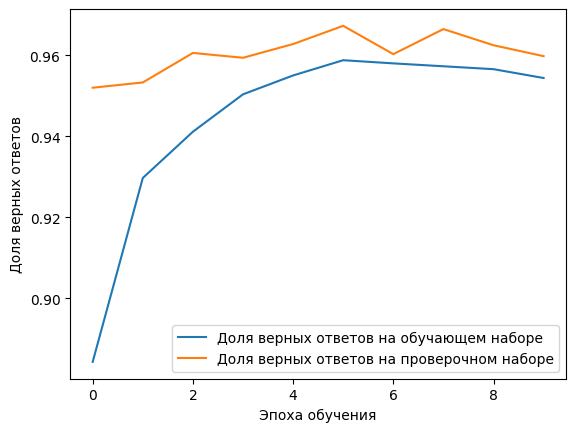

In [ ]:
# обучаем сеть на данных mnist
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    verbose=1)

# график точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
# поиск максимального показателя точности
accuracy = history.history['accuracy']
max_accuracy = max(accuracy)
max_accuracy_index = accuracy.index(max(accuracy))
max_accuracy = accuracy[max_accuracy_index]

In [ ]:
new_row = {'accuracy': max_accuracy, 'model': 'model_12', 'neurons_num': '16', 'activation': 'linear', 'batch_size': '100'}

In [ ]:
df.loc[len(df)] = new_row

In [ ]:
df

In [ ]:
accuracy_column = ['accuracy']

In [ ]:
# выделение максимального и минимального значений
styled_table = df.style.highlight_max(color='lightgreen', axis=0, subset=accuracy_column)
styled_table.highlight_min(color='pink', axis=0, subset=accuracy_column)
display(styled_table)

,model,neurons_num,activation,batch_size,accuracy
0,model_1,2,relu,10,0.973633
1,model_2,2,relu,100,0.972033
2,model_3,2,linear,10,0.925917
3,model_4,2,linear,100,0.937450
4,model_5,4,relu,10,0.979917
5,model_6,4,relu,100,0.984133
6,model_7,4,linear,10,0.909400
7,model_8,4,linear,100,0.936850
8,model_9,16,relu,10,0.987100
9,model_10,16,relu,100,0.989483


**Выводы**

*(!) эксперименты с параметром batch_size, равному размеру всей базы (50000), провести не удалось, поскольку появлялась ошибка «ResourceExhaustedError: Graph execution error» (недостаток оперативной памяти)*

* Значение метрики accuracy для всех моделей находится в диапазоне от 0.909 до 0.989, что говорит о высокой точности предсказаний всех моделей.
* Модели с большим количеством нейронов (16) в скрытом слое показывают более высокие значения точности по сравнению с моделями с меньшим количеством нейронов (2 и 4).
* Самый высокий показатель точности (0.989) установлен у модели со следующими параметрами: количество нейронов — 16, функция активации — relu, размер батча — 100.
* Самый низкий показатель точности (0.909) установлен у модели со следующими параметрами: количество нейронов — 4, функция активации — linear, размер батча — 10.
* Модель лучше работает с нелинейными зависимостями, так как модель показывала более высокие значения точности с использованием функции активации «relu» (от 97%), чем с использованием функции активации «linear» (от 90% до 95%).




#**Распознавание изображений из набора данных Cifar10**

✔ Нормальный уровень сложности

In [ ]:
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
print(f'Размер тренировочной выборки: {x_train10.shape}')

Размер тренировочной выборки: (50000, 32, 32, 3)


In [ ]:
# названия классов по порядку
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

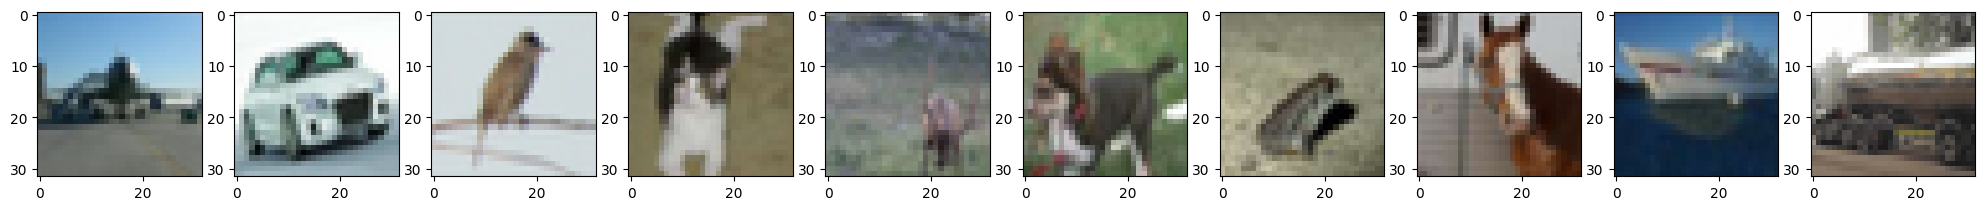

In [ ]:
# вывод картинок по каждому классу для примера

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) # 10 графиков
for i in range(10):
  label_indexes = np.where(y_train10==i)[0] # список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # случайным образом выбираем из списка индекс
  img = x_train10[index] # выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img)) # отображение

plt.show()

In [ ]:
# преобразование y_train и y_test сетей в формат one-hot encoding
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

In [ ]:
# размеры выборок перед обучением
print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


**Нейронная сеть**

In [ ]:
# создание таблицы для сравнения количества слоев conv2d
layers_num_conv2d = pd.DataFrame(columns=['model', 'num_of_layers', 'accuracy'])

In [ ]:
# создание таблицы для сравнения нейронов в слоях conv2d
neur_num_conv2d = pd.DataFrame(columns=['model', 'num_of_neurons', 'accuracy'])

In [ ]:
# создание таблицы для сравнения MaxPooling2D
maxp2d = pd.DataFrame(columns=['model', 'pool_size', 'accuracy'])

In [ ]:
# создание таблицы для сравнения Dropout
dropout = pd.DataFrame(columns=['model', 'rate', 'accuracy'])

Epoch 1/10
391/391 [==============================] - 13s 20ms/step - loss: 1.5486 - accuracy: 0.4321 - val_loss: 1.2753 - val_accuracy: 0.5456
Epoch 2/10
391/391 [==============================] - 7s 19ms/step - loss: 1.1323 - accuracy: 0.5950 - val_loss: 0.9809 - val_accuracy: 0.6482
Epoch 3/10
391/391 [==============================] - 8s 19ms/step - loss: 0.9521 - accuracy: 0.6635 - val_loss: 1.0676 - val_accuracy: 0.6196
Epoch 4/10
391/391 [==============================] - 8s 19ms/step - loss: 0.8303 - accuracy: 0.7063 - val_loss: 0.8432 - val_accuracy: 0.7046
Epoch 5/10
391/391 [==============================] - 7s 19ms/step - loss: 0.7480 - accuracy: 0.7353 - val_loss: 0.7614 - val_accuracy: 0.7359
Epoch 6/10
391/391 [==============================] - 7s 19ms/step - loss: 0.6900 - accuracy: 0.7582 - val_loss: 0.6906 - val_accuracy: 0.7670
Epoch 7/10
391/391 [==============================] - 8s 20ms/step - loss: 0.6408 - accuracy: 0.7760 - val_loss: 0.6724 - val_accuracy: 0.765

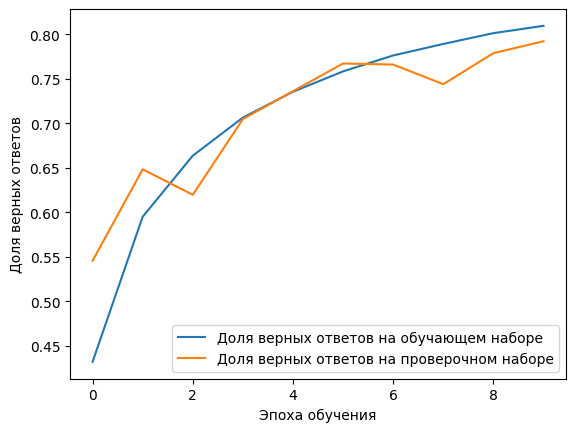

In [ ]:
#задаём batch_size
batch_size = 128

# последовательная модель
model = Sequential()
# первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
# второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# слой регуляризации Dropout
model.add(Dropout(0.25))

# слой пакетной нормализации
model.add(BatchNormalization())
# третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# слой регуляризации Dropout
model.add(Dropout(0.25))

# слой пакетной нормализации
model.add(BatchNormalization())
# пятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# шестой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# слой регуляризации Dropout
model.add(Dropout(0.25))

# слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# слой регуляризации Dropout
model.add(Dropout(0.25))
# выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

# компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# обучение сети
history = model.fit(x_train10,
                    y_train10,
                    batch_size=batch_size,
                    epochs=10,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

# график точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
# поиск максимального показателя точности
accuracy = history.history['accuracy']
max_accuracy = max(accuracy)
max_accuracy_index = accuracy.index(max(accuracy))
max_accuracy = accuracy[max_accuracy_index]

**Исследование влияния количества слоев Conv2D**

In [ ]:
new_row = {'accuracy': max_accuracy, 'model': 'model_3', 'num_of_layers': '10'}
layers_num_conv2d.loc[len(layers_num_conv2d)] = new_row

In [ ]:
layers_num_conv2d

,model,num_of_layers,accuracy
0,model_1,6,0.79856
1,model_2,8,0.80500
2,model_3,10,0.79606


*   Увеличение количества слоев Conv2D может помочь улучшить точность модели. Это связано с тем, что каждый слой Conv2D извлекает различные признаки изображения, что позволяет модели учить более сложные и абстрактные паттерны.
*   При использовании большого количества слоев Conv2D следует учитывать время обучения модели, так как обработка каждого слоя занимает дополнительное время.






**Исследование влияния количества нейронов (фильтров) в слоях conv2d**

In [ ]:
new_row = {'accuracy': max_accuracy, 'model': 'model_3', 'num_of_neurons': '128'}
neur_num_conv2d.loc[len(neur_num_conv2d)] = new_row
neur_num_conv2d

,model,num_of_neurons,accuracy
0,model_1,32,0.79878
1,model_2,64,0.81504
2,model_3,128,0.82552




* Увеличение количества нейронов (фильтров) в слоях Conv2D может помочь модели извлекать более сложные и детализированные признаки изображения, что повышает точность модели.
* Однако при увеличении количества нейронов также следует учитывать время обучения модели и использование ресурсов. Большое количество нейронов требует больше вычислительной мощности и памяти.


**Исследование влияния MaxPooling2D в сети**

In [ ]:
new_row = {'accuracy': max_accuracy, 'model': 'model_3', 'pool_size': '4, 4'}
maxp2d.loc[len(maxp2d)] = new_row
maxp2d

,model,pool_size,accuracy
0,model_1,"2, 2",0.79856
1,model_2,"3, 3",0.78214
2,model_3,"4, 4",0.75946


  * Использование слоя MaxPooling2D помогает уменьшить размерность выходных данных после сверточных слоев, сохраняя при этом наиболее важные признаки.
  * MaxPooling2D также помогает снизить количество параметров модели и уменьшить риск переобучения.
  * Но стоит помнить, что модель может потерять некоторую информацию о расположении объектов на изображении.
  * На наших данных увеличение размера окна пулинга ведет к снижению точности (от 79% к 75%), то есть при более большем снижении размерности мы теряем важную информацию.
  * При увеличении размера окна модель сокращает время работы.

**Исследование влияния Dropout в сети**

In [ ]:
new_row = {'accuracy': max_accuracy, 'model': 'model_3', 'rate': '0.45'}
dropout.loc[len(dropout)] = new_row
dropout

,model,rate,accuracy
0,model_1,0.25,0.79786
1,model_2,0.35,0.76910
2,model_3,0.45,0.71020


* Использование слоя Dropout помогает бороться с проблемой переобучения, так как случайным образом отключает некоторые нейроны во время обучения.
* Dropout позволяет модели улучшать ее обобщающую способность.
* При использовании Dropout следует учитывать, что слишком большая величина Dropout может привести к потере информации и недообучению модели, что видно по снижению точности работы модели выше (от 79% до 71%).

In [ ]:
#Распознаём все тестовые картинки
prediction = model.predict(x_test10)

313/313 [==============================] - 2s 3ms/step


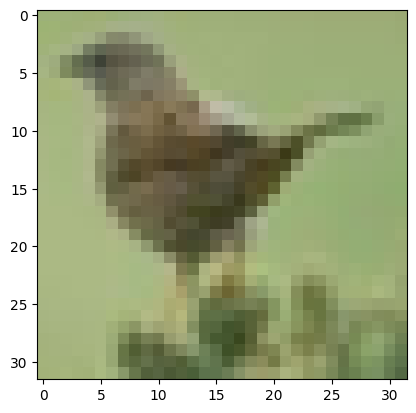

Выход сети:  [1.1501220e-03 3.9436440e-08 9.8948216e-01 1.1150534e-03 5.2196276e-03
 1.2077305e-03 1.8246239e-03 3.5895869e-07 2.8029095e-07 4.1164061e-08]
Распознанный образ:  2
Верный ответ:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Распознанный образ на картинке:  птица


In [ ]:
# случайный пример
n = np.random.randint(x_test10.shape[0])

# вывод картинки на экран
plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
plt.show()

print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test10[n])
print("Распознанный образ на картинке: ", classes[np.argmax(prediction[n])])

# **Распознавание марок машин**

✔ Сложный уровень сложности

In [ ]:
!unzip -q "/content/drive/MyDrive/нейросетки/базы/middle_fmr.zip" -d /content/cars #Указываем путь к базе в Google Drive

In [ ]:
train_path = '/content/cars' # картинки в папках по категориям
batch_size = 16 # размер выборки
img_width = 92 # ширина изображения
img_height = 52 # высота изображения

In [ ]:
# генератор изображений
datagen = ImageDataGenerator(
    rescale=1./255, # значения цвета меняем на дробные показания
    rotation_range=30, # поворачиваем изображения при генерации выборки
    width_shift_range=0.1, # двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, # двигаем изображения по высоте при генерации выборки
    zoom_range=0.2, # зумируем изображения при генерации выборки
    horizontal_flip=True, # включаем отзеркаливание изображений
    fill_mode='nearest', # заполнение пикселей вне границ ввода
    validation_split=0.2 # разделение изображений на обучающую и тестовую выборку
)

In [ ]:
# обучающая выборка
train_generator = datagen.flow_from_directory(
    train_path, # путь ко всей выборке выборке
    target_size=(img_width, img_height), # размер изображений
    batch_size=batch_size, # размер batch_size
    class_mode='categorical', # категориальный тип выборки (разбиение по маркам авто)
    shuffle=True, # перемешивание выборки
    subset='training' # набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation' # валидационный набор
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


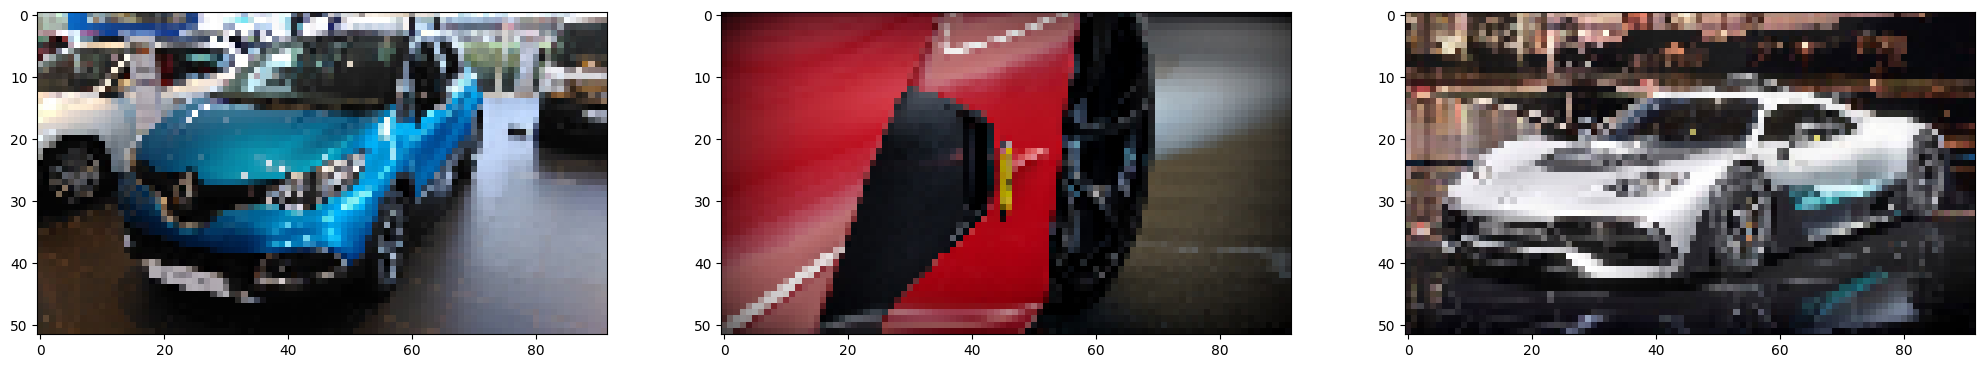

In [ ]:
# примеры авто из каждой категории

fig, axs = plt.subplots(1, 3, figsize=(25, 5)) # 3 категории
for i in range(3):
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'
  img_path = car_path + random.choice(os.listdir(car_path)) # случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width)))

plt.show()

<ipython-input-11-da14f6dc12d2>:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/70
171/171 [==============================] - 18s 87ms/step - loss: 1.0017 - accuracy: 0.4642 - val_loss: 0.9734 - val_accuracy: 0.4955
Epoch 2/70
171/171 [==============================] - 11s 67ms/step - loss: 0.9339 - accuracy: 0.5431 - val_loss: 0.9434 - val_accuracy: 0.5342
Epoch 3/70
171/171 [==============================] - 12s 68ms/step - loss: 0.9122 - accuracy: 0.5651 - val_loss: 0.9594 - val_accuracy: 0.5432
Epoch 4/70
171/171 [==============================] - 13s 77ms/step - loss: 0.8966 - accuracy: 0.5787 - val_loss: 0.9221 - val_accuracy: 0.5372
Epoch 5/70
171/171 [==============================] - 13s 77ms/step - loss: 0.8694 - accuracy: 0.6043 - val_loss: 0.9562 - val_accuracy: 0.5387
Epoch 6/70
171/171 [==============================] - 16s 91ms/step - loss: 0.8599 - accuracy: 0.6036 - val_loss: 0.9306 - val_accuracy: 0.5476
Epoch 7/70
171/171 [==============================] - 14s 82ms/step - loss: 0.8542 - accuracy: 0.5937 - val_loss: 0.9034 - val_accuracy:

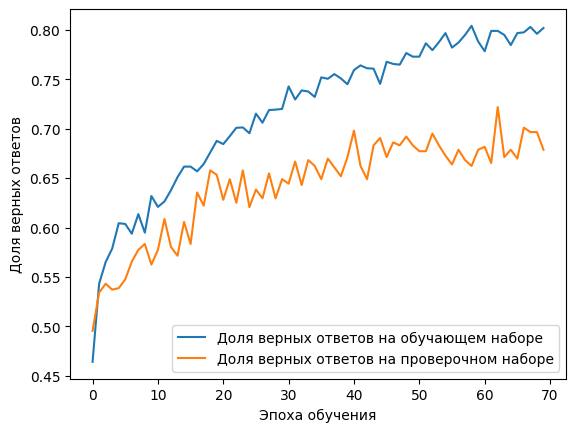

In [ ]:
# создание нейронной сети

model = Sequential()

# добавление сверточных слоев
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# слой преобразования данных из 2D представления в плоское
model.add(Flatten())

# добавление полносвязных слоев
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs=70,
    verbose=1
)

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
# поиск максимального показателя точности
accuracy = history.history['accuracy']
max_accuracy = max(accuracy)
max_accuracy_index = accuracy.index(max(accuracy))
max_accuracy = accuracy[max_accuracy_index]
print(f'Точность работы модели: {round((max_accuracy), 2)*100}%')

Точность работы модели: 80.0%


In [ ]:
model.save('cars.80')

**Способы поднятия показателя точности (57% --> 80%):**


* Изменение размера пакета, передаваемого в нейронную сеть одновременно для обновления весов (**batch_size**): уменьшение показетеля с 25 до 16; маленький пакет помогает модели лучше генерализировать данные; видно, что такой ход помог в работе с небольшим количеством данных, но потребовалось больше эпох для достижения результата;
* **Аугментация данных**: увеличение показателей, влияющих на сдвиг по ширине и высоте изображения, зуммировование;  
*   Увеличение **количества сверточных слоев** перед слоем преобразования данных в плоское представление;
* Изменение **количества нейронов** в слоях;
* Уменьшение **количества фильтров** в сверточных слоях;
* Изменение параметра **Dropout**: увеличение (30%) в целях уменьшения переобучения модел;
* **Изменение оптимизатора** (RMSprop) и обучающего шага дало отрицательный результ;
* Увеличение **количества эпох** обучения, что дает больше времени для обучения и сходимости.

